In [1]:
import os
import pandas as pd
# Load data from datasets/Titanic/..

def load_data(titanic_path):
    train_path = os.path.join(titanic_path, "train.csv")
    test_path = os.path.join(titanic_path, "test.csv")
    return pd.read_csv(train_path), pd.read_csv(test_path)

titanic_path = os.path.join("datasets", "Titanic")

X_train, X_test = load_data(titanic_path)
# split into classes and labels
y_train = X_train['Survived']

In [36]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [2]:
X_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
# make a copy to do some brief insight toward the dataset
X_train_1 = X_train.copy()
X_test_1 = X_test.copy()
y_train_1 = y_train.copy()

In [4]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
X_train_1["Name"].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [6]:
X_train_1.describe() #  The describe() method shows a summary of 
                   #  the numerical attributes, null values are ignored
# count: 要素の個数
# unique: ユニークな（一意な）値の要素の個数
# top: 最頻値（mode）
# freq: 最頻値の頻度（出現回数）
# mean: 算術平均
# std: 標準偏差
# min: 最小値
# max: 最大値
# 50%: 中央値（median）
# 25%, 75%: 1/4分位数、3/4分位数

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
import numpy as np

for i in range(len(X_train_1["Sex"])):
    if X_train_1["Sex"][i] == "female":
        X_train_1["Sex"][i] = 1
    elif X_train_1["Sex"][i]  == "male":
        X_train_1["Sex"][i] = 0

C:\Users\blueb\AppData\Local\Temp\ipykernel_11008\27299380.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_1["Sex"][i] = 0
C:\Users\blueb\AppData\Local\Temp\ipykernel_11008\27299380.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_1["Sex"][i] = 1


In [40]:
import numpy as np

for i in range(len(X_test_1["Sex"])):
    if X_test_1["Sex"][i] == "female":
        X_test_1["Sex"][i] = 1
    elif X_test_1["Sex"][i]  == "male":
        X_test_1["Sex"][i] = 0

C:\Users\blueb\AppData\Local\Temp\ipykernel_11008\1926557079.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_1["Sex"][i] = 0
C:\Users\blueb\AppData\Local\Temp\ipykernel_11008\1926557079.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_1["Sex"][i] = 1


In [8]:
X_train_1.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


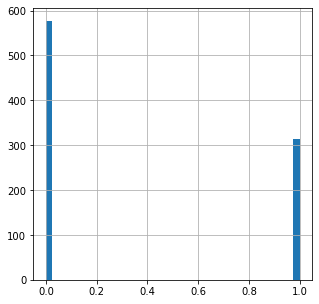

In [9]:
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt
X_train_1["Sex"].hist(bins=40, figsize=(5,5))
plt.show()

In [10]:
X_train_1["Sex"] = X_train_1["Sex"].astype(int)

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Sex', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Sex'>,
        <AxesSubplot:xlabel='Sex', ylabel='Sex'>]], dtype=object)

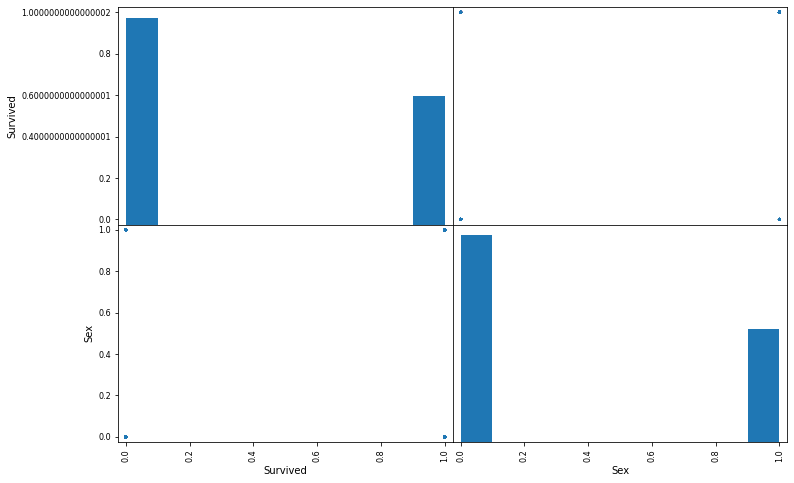

In [11]:
#
from pandas.plotting import scatter_matrix
attributes=["Survived", "Sex"]
scatter_matrix(X_train_1[attributes], figsize=(12,8))

In [17]:
X_train_1["Survived"].shape

(891,)

In [18]:
X_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB


In [19]:
# loat a lot datas in Class:"age", "Cabin", "Embarked"
# here we decide to ignore Cabin and may fill the missed age attributes with the
# median 
X_train_1.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
X_train_1["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
# データを大体理解したらPipleineを作る


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  # medianでNullを埋めるために使う
from sklearn.preprocessing import StandardScaler 

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()) #データの正規化
])

In [32]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")), #文字データに対して,最頻値を代入
    ('cat_encoder', OneHotEncoder(sparse=False)) 
    
])# parse = Falseで密行列の出力を防ぐ
# ''で囲まれたところは名前を定義するためのもので、あんまり大した意味はない
    
from sklearn.compose import ColumnTransformer #データの正規化
num_attribs = ["Fare", "Parch", "SibSp", "Age" ] 
cat_attribs = ["Pclass", "Sex", "Embarked"] #離散かで表現されている文字情報に近い部分に対してcat_pipelineでやる

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

In [33]:
X_train_2 = full_pipeline.fit_transform(X_train_1[ num_attribs + cat_attribs])
pd.DataFrame(X_train_2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.502445,-0.473674,0.432793,-0.565736,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,0.786845,-0.473674,0.432793,0.663861,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,-0.488854,-0.473674,-0.474545,-0.258337,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.420730,-0.473674,0.432793,0.433312,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.486337,-0.473674,-0.474545,0.433312,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.386671,-0.473674,-0.474545,-0.181487,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
887,-0.044381,-0.473674,-0.474545,-0.796286,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
888,-0.176263,2.008933,0.432793,-0.104637,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
889,-0.044381,-0.473674,-0.474545,-0.258337,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [34]:
y_train_1

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [35]:
# try to train this with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators =100, random_state=42)
forest_clf.fit(X_train_2, y_train_1)
# trained!

RandomForestClassifier(random_state=42)

In [41]:
X_test_2 = full_pipeline.transform(X_test_1[num_attribs + cat_attribs])
y_pred = forest_clf.predict(X_test_2)

In [42]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train_2, y_train_1, cv=10)
forest_scores.mean()

0.8115230961298376

In [43]:
# try an SVC
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train_2, y_train_1, cv=10)
svm_scores.mean()

0.8249313358302123

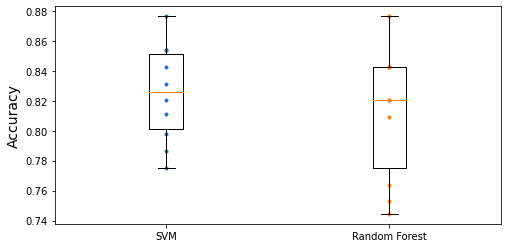

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

#  The random forest classifier got a very high score on one of the 10 folds,
#  but overall it had a lower mean score, as well as a bigger spread, so it looks like the 
#  SVM classifier is more likely to generalize well.